In [3]:
#librarys
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries



In [4]:
key = 'M1VXGBGEA8QLPLUF'


In [5]:
ts = TimeSeries(key,output_format="pandas")
data,meta = ts.get_intraday('TSLA',interval="60min",outputsize="full")


In [6]:
#check the data
meta

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2022-11-09 20:00:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 640 entries, 2022-11-09 20:00:00 to 2022-09-15 05:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    640 non-null    float64
 1   2. high    640 non-null    float64
 2   3. low     640 non-null    float64
 3   4. close   640 non-null    float64
 4   5. volume  640 non-null    float64
dtypes: float64(5)
memory usage: 30.0 KB


In [8]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-11-09 20:00:00,176.74,177.20,176.35,176.50,205879.0
2022-11-09 19:00:00,176.79,177.22,176.70,176.75,165441.0
2022-11-09 18:00:00,176.55,177.59,175.51,176.75,957899.0
2022-11-09 17:00:00,177.62,178.38,176.40,176.57,1376044.0
2022-11-09 16:00:00,179.30,188.21,177.12,177.60,19169773.0


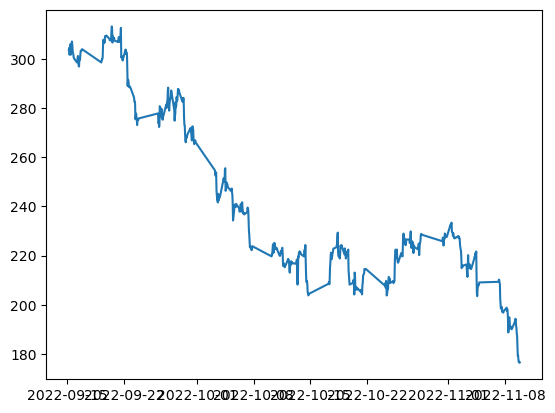

In [9]:
plt.plot(data["4. close"])

In [10]:
# rename the data

columns = ["open","high","low","close","volume"]
data.columns = columns

In [11]:
data["TradeDate"] = data.index.date
data["time"] = data.index.time

In [12]:
data.loc["2022-11-08"].head(10)


,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-11-08 20:00:00,190.5000,190.6900,190.0000,190.0000,119690.0,2022-11-08,20:00:00
2022-11-08 19:00:00,190.3500,190.7200,190.2100,190.5500,106438.0,2022-11-08,19:00:00
2022-11-08 18:00:00,190.7600,191.3000,190.1500,190.3500,192874.0,2022-11-08,18:00:00
2022-11-08 17:00:00,191.2750,191.3900,190.3200,190.7615,1484554.0,2022-11-08,17:00:00
2022-11-08 16:00:00,190.4350,192.4700,190.2000,191.2800,16963086.0,2022-11-08,16:00:00
2022-11-08 15:00:00,193.3062,193.5924,188.9300,190.4400,14868243.0,2022-11-08,15:00:00
2022-11-08 14:00:00,194.8800,195.2000,191.4400,193.3139,12870149.0,2022-11-08,14:00:00
2022-11-08 13:00:00,194.2600,195.1000,192.2056,194.8663,13775613.0,2022-11-08,13:00:00
2022-11-08 12:00:00,190.3200,194.4500,189.5600,194.2300,19637809.0,2022-11-08,12:00:00


In [13]:
#set a limit to trading times
market = data.between_time("09:30:00","16:00:00").copy()
market.sort_index(inplace=True)
market.info()
#data is also 8 days worth

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 280 entries, 2022-09-15 10:00:00 to 2022-11-09 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       280 non-null    float64
 1   high       280 non-null    float64
 2   low        280 non-null    float64
 3   close      280 non-null    float64
 4   volume     280 non-null    float64
 5   TradeDate  280 non-null    object 
 6   time       280 non-null    object 
dtypes: float64(5), object(2)
memory usage: 17.5+ KB


In [14]:
market.groupby("TradeDate").agg({"low":min,"high":max})

,low,high
TradeDate,,
2022-09-15,300.7247,309.1200
2022-09-16,295.6005,303.7100
2022-09-19,297.8000,309.8400
2022-09-20,305.5800,313.3300
2022-09-21,300.6300,313.8000
2022-09-22,285.8200,302.3700
2022-09-23,272.8200,284.5000
2022-09-26,270.3100,284.0900
2022-09-27,277.5100,288.6700


In [15]:
market.loc[market.groupby("TradeDate")['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-09-15 10:00:00,303.3000,306.6300,300.7247,306.0415,10850592.0,2022-09-15,10:00:00
2022-09-16 11:00:00,296.9700,298.9800,295.6005,296.8300,12341825.0,2022-09-16,11:00:00
2022-09-19 10:00:00,300.7440,305.6000,297.8000,305.1200,9853341.0,2022-09-19,10:00:00
2022-09-20 10:00:00,307.7600,309.3591,305.5800,307.6800,8834966.0,2022-09-20,10:00:00
2022-09-21 16:00:00,312.6000,313.2200,300.6300,300.7000,12919575.0,2022-09-21,16:00:00
2022-09-22 15:00:00,289.8000,290.3000,285.8200,288.4800,9041812.0,2022-09-22,15:00:00
2022-09-23 15:00:00,275.8547,276.3500,272.8200,273.0400,6562053.0,2022-09-23,15:00:00
2022-09-26 10:00:00,273.0100,280.8000,270.3100,280.7300,11746531.0,2022-09-26,10:00:00
2022-09-27 14:00:00,280.4050,280.4050,277.5100,278.9000,4879113.0,2022-09-27,14:00:00


In [16]:
market.loc[market.groupby("TradeDate")['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-09-15 11:00:00,306.0500,309.1200,301.0800,301.6884,14182422.0,2022-09-15,11:00:00
2022-09-16 16:00:00,301.8600,303.7100,300.6800,303.2300,10763926.0,2022-09-16,16:00:00
2022-09-19 12:00:00,307.7300,309.8400,306.4300,306.5500,9645933.0,2022-09-19,12:00:00
2022-09-20 12:00:00,311.2000,313.3300,310.7700,313.1282,9249350.0,2022-09-20,12:00:00
2022-09-21 15:00:00,309.5000,313.8000,303.2300,312.5601,17911481.0,2022-09-21,15:00:00
2022-09-22 10:00:00,301.6101,302.3700,294.4112,295.7700,10507475.0,2022-09-22,10:00:00
2022-09-23 10:00:00,281.7500,284.5000,274.7700,275.4000,13839706.0,2022-09-23,10:00:00
2022-09-26 11:00:00,280.7200,284.0900,279.4400,280.4441,12543784.0,2022-09-26,11:00:00
2022-09-27 11:00:00,287.4700,288.6700,284.6000,288.2500,11077339.0,2022-09-27,11:00:00


In [17]:
html = market.to_html()

In [21]:
text_file = open("index.html","w")
text_file.write(html)
text_file.close()